## Насколько в Питоновский список легко добавлять?

In [22]:
import sys
import time

# import zarr
import llist  # 

lt = [0.0] * 250_000

# l = zarr.array(data=[], shape=(0,), chunks=(1000,), dtype=int)
l = llist.sllist()


print("Inserting at 0...")

for i in range(len(lt)):
    # l.append((0,))
    l.append(0)
    lt[i] = time.time()

print(f"Done. l takes {sys.getsizeof(l)} bytes.")

Inserting at 0...
Done. l takes 64 bytes.


Profiling...
Plotting...


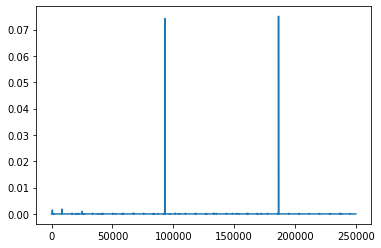

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Profiling...")
d = [
    t2 - t1 for t1, t2 in zip(lt[:-1], lt[1:])
]

print("Plotting...")

plt.plot(range(len(d)), d)
plt.show()

Smoothing...
Plotting...


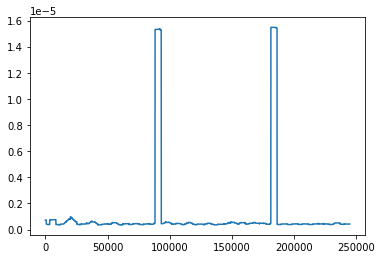

In [24]:
%matplotlib inline

import numpy as np
window_size = 5000

a0 = np.average(d[:window_size])

def windows():
    global a0
    for i in range(len(d)-window_size):
        yield a0
        a0 += (d[i+window_size] - d[i]) / window_size

print("Smoothing...")
averages = [a0] + [v for v in windows()]
print("Plotting...")

plt.plot(range(len(averages)), averages)
plt.show()